In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('50_Startups.csv')

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [32]:
df.shape

(50, 5)

In [33]:
df.size

250

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [36]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [37]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [38]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


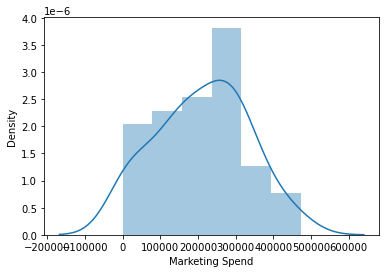

In [39]:
sns.distplot(df['Marketing Spend']);

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


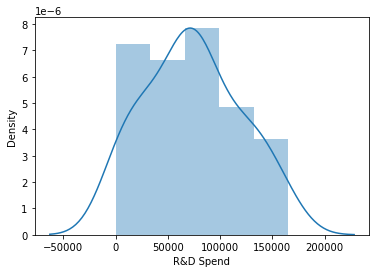

In [40]:
sns.distplot(df['R&D Spend']);

<AxesSubplot:>

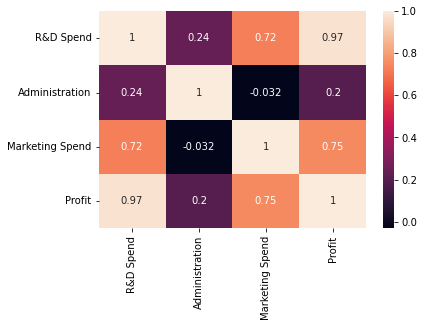

In [41]:
sns.heatmap(df.corr(),annot = True)

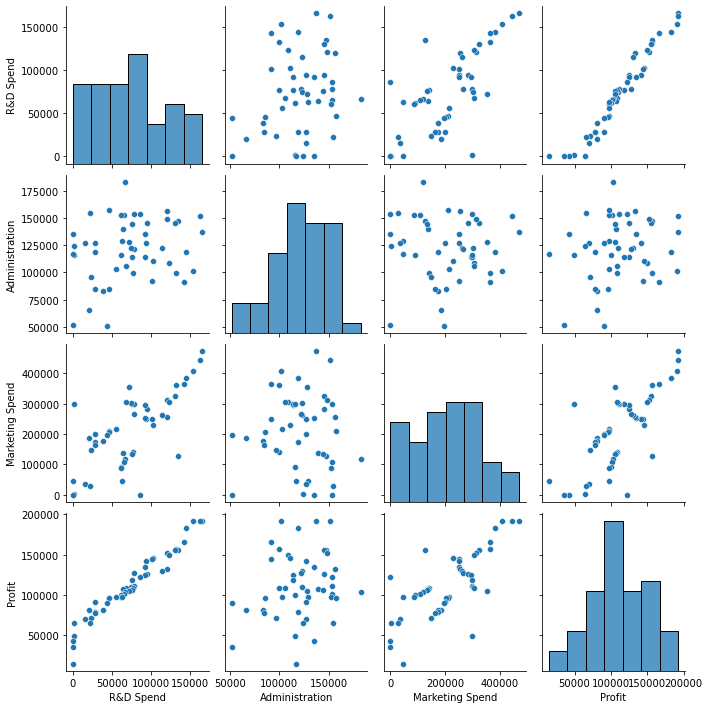

In [42]:
sns.pairplot(df)

# Single Linear Regression

In [43]:
x = df[['R&D Spend']]
y = df['Profit']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2, random_state = 42)

In [46]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [47]:
s=LR.coef_
r=LR.intercept_
print(f'coefficient is : {s}\nintercept is: {r}')

coefficient is : [0.85360911]
intercept is: 49336.66803799113


C:\Users\ervai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


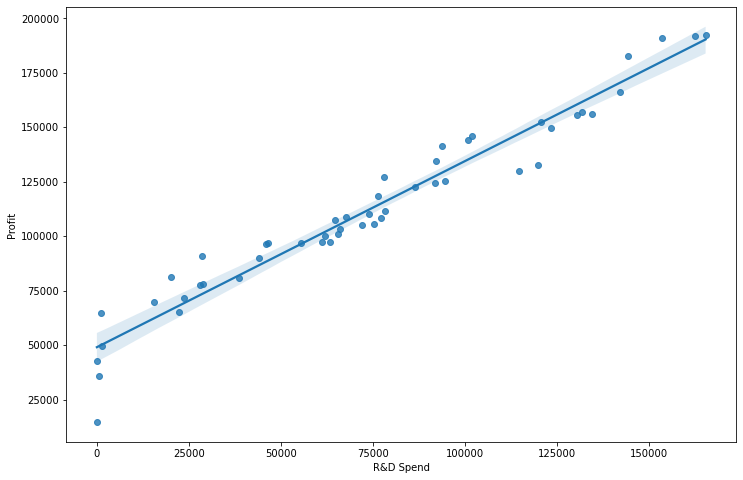

In [48]:
plt.figure(figsize=(12,8))
sns.regplot(x,y)
plt.show()

In [49]:
from sklearn.metrics import r2_score
y_test_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print(f'training = {a}\ntesting = {b}')

training = 0.9467864227524652
testing = 0.9265108109341951


In [50]:
MSE = metrics.mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print(f'Mean squared error is :{MSE}\nRoot mean squared error is {RMSE}')

Mean squared error is :59510962.80787996
Root mean squared error is 7714.334890830185


# Multiple Linear Regression

In [51]:
x = df[['R&D Spend','Marketing Spend']]
y = df['Profit']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [53]:
MLR=LinearRegression()

In [54]:
MLR.fit(x_train,y_train)

LinearRegression()

In [55]:
a = list(zip(MLR.coef_))
b = MLR.intercept_
print(f'Coefficient is : {a}\nIntercept is : {b}')

Coefficient is : [(0.783374314890292,), (0.03923978714553147,)]
Intercept is : 45542.392477514295


In [56]:
y_test_pred = MLR.predict(x_test)
y_train_pred = MLR.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print(f'training = {a}\ntesting = {b}')

training = 0.9518828286863577
testing = 0.9168381183550247


# Standardization 

In [58]:
x= df[['R&D Spend','Marketing Spend']]
y=df['Profit']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
Reg_predict=reg.predict(x_test)

In [64]:
reg.score(x_test, y_test)

0.9168381183550247

In [65]:
reg.score(x_train, y_train)

0.9518828286863577

In [66]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.9168381183550247
MSE =  67343832.58979604
